In [2]:
###############################
# Como leer un cubo de datos
###############################

#import pyfits #modulo para leer archivos fits
from astropy.io import fits
import matplotlib.pyplot as plt #modulo para graficar
import numpy as np #este modulo es para trabajar con matrices como en matlab

#esta funcion les entrega un arreglo con los valores reales del eje correspondiente
#1 es velocidad, 2 es longitud galactica, 3 es latitud galactica
def values(h,j):
	N=h['NAXIS'+str(j)];
	val=np.zeros(N);
	for i in range(0,N):
		val[i] = (i+1-float(h['CRPIX'+str(j)]))*float(h['CDELT'+str(j)]) + float(h['CRVAL'+str(j)]);
	return val;

cubo	= fits.open("southgal_fixbadc.fits") #abrir objeto cubo de datos
data 	= cubo[0].data #extraer matriz de datos
header	= cubo[0].header #extraer el header del archivo fits
#print header

#Estos seran los tres arreglos con los valores reales de los tres ejes del cubo
velocidad=values(header,1)
longitud=values(header,2)
latitud=values(header,3)

#print 'v =',velocidad
#print 'l =',longitud
#print 'b =',latitud

#velocidad= np.linspace(-230.7985, 165.8235, 306)
longitud= np.linspace(300, 348,49)
latitud= np.linspace(-2, 2., 33)

#Ahora pueden trabajar con el cubo como si fuera una matriz

#Ejemplo 1, graficar el espectro localizado en l=325.00 y b=-0.25
i_l=-1
i_b=-1
i_k=-1

#con este par de ciclos buscan en que indice esta la longitud y la latitud esperada
for i,lat in enumerate(latitud):
	if lat <= -1: 
		i_b = i
for j,lon in enumerate(longitud):
	if lon <= 300:
		i_l = j
#0  0.125  0.25  0.375   0.5  0.625 0.75  0.875 1  1.125   1.25  1.375   1.5  1.625  1.75  1.875  2
# Se hace al ojo
ruido = np.where((velocidad <= -90) | (velocidad >= -4))
T = data[i_b][i_l][:]

# Usando Sigma clipping
from astropy.stats import sigma_clip
#r = sigma_clip(T, sigma=3)
r = sigma_clip(T, sigma_lower=3, sigma_upper=3)
rms = np.sqrt(np.mean(r**2))
rmask = r.mask
v_terminal = velocidad[rmask][0]
print 'v_terminla con mascara =', v_terminal

v_terminal = np.nan
for i in range(len(T)):
    temp = T[i]
    if temp >= 3*rms:
        v_terminal = velocidad[i]
        break
print 'v_terminal sin mascara =', v_terminal

v_terminla con mascara = -39.6397
v_terminal sin mascara = -39.6397


In [48]:
%matplotlib inline

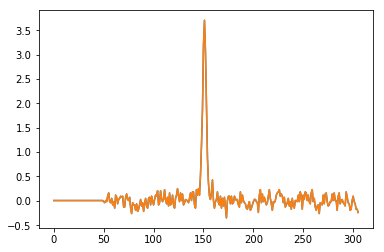

In [9]:
plt.plot(T)
plt.show()

In [31]:
maxeix=np.argmax(data,axis=2)

In [55]:
longitud

array([ 300.,  301.,  302.,  303.,  304.,  305.,  306.,  307.,  308.,
        309.,  310.,  311.,  312.,  313.,  314.,  315.,  316.,  317.,
        318.,  319.,  320.,  321.,  322.,  323.,  324.,  325.,  326.,
        327.,  328.,  329.,  330.,  331.,  332.,  333.,  334.,  335.,
        336.,  337.,  338.,  339.,  340.,  341.,  342.,  343.,  344.,
        345.,  346.,  347.,  348.])

In [44]:
varr=np.array([velocidad[i] for i in maxeix.ravel()]).reshape(maxeix.shape)

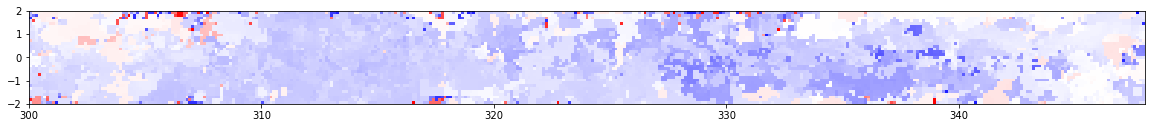

In [59]:
plt.figure(figsize=(20,5))
plt.imshow(varr,cmap='bwr',extent=[longitud[0],longitud[-1],latitud[0],latitud[-1]])

In [43]:
varr

array([-61.7465,  -0.6277,  -0.6277, ..., -48.7425, -30.5369, -30.5369])